# Analysis and extraction of patch from DarkSkyMocks

## Author: César Arroyo Cárdenas
Affiliation: Instituto de Física, UNAM

In [ ]:
reset # reset button just in case.

In [38]:
%pylab inline

import numpy as np # n-dimensional array library.
from astropy.table import Table # A class to represent tables of heterogeneous data.
from astropy.io import fits # Access to FITS (Flexible Image Transport System) files.

import desimodel.io
import desimodel.focalplane
import desimodel.footprint
from desitarget.targetmask import desi_mask, bgs_mask, mws_mask
from desitarget.targets import target_bitmask_to_string

Populating the interactive namespace from numpy and matplotlib


## Analyzing the galaxy catalog (`zcat`) files

In this notebook I will analyze the data inside the galaxy catalogues created under the Dark Sky simulations for DESI. For this I will use the file in the path
`/global/project/projectdirs/desi/users/jguy/mocks/darksky-v1.0.1-v2/zcat-0-level1.fits`.

We are going to try to understand what is inside of this file and understand the information we require.

Information for FITS files can be found in: <br>
* [FITS File handling (astropy.io.fits)](http://docs.astropy.org/en/stable/io/fits/): This is an introduction to FITS files usage.
* [File Handling and Convenience Functions](http://docs.astropy.org/en/stable/io/fits/api/files.html): These are usual functions for handling FITS files. They are found in `astropy.io.fits`.
* [HDU Lists](http://docs.astropy.org/en/stable/io/fits/api/hdulists.html): This is an important class defined in `astropy.io.fits.hdu.hdulist`. This class is what is returned when the function `astropy.io.fits.open` is used. Methods within this class can be found in this link.

The HDU List class is a list of HDUs or Header Data Units. As in the first link:
>  An **HDU (Header Data Unit)** is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table.

Each HDU List consists of HDUs, and HDUs have attributes `.header` and `.data`. Headers are 80 byte "cards" which have each a keyword, a value and a comment. The data part consist of a [Image HDU](http://docs.astropy.org/en/stable/io/fits/api/images.html)-like or [Table HDU](http://docs.astropy.org/en/stable/io/fits/api/tables.html)-like object.

If the HDU is Image-HDU-like then `.data` will return a `numpy.ndarray` and if the HDU is Table-HDU-like the `.data` will return a `numpy.recarray` object with extended properties. Documentation for each class can be found in [numpy.ndarray](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.html) and [numpy.recarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.recarray.html).

In [2]:
# Absolute path of the file to analyze.
galaxy_catalog = '/global/project/projectdirs/desi/users/jguy/mocks/darksky-v1.0.1-v2/zcat-0-level1.fits'

In [6]:
darktable = fits.open(galaxy_catalog) # Open the file.
print(darktable.info()) # Summarize the info of the HDUs in this HDUList.

Filename: /global/project/projectdirs/desi/users/jguy/mocks/darksky-v1.0.1-v2/zcat-0-level1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  ZCATALOG      1 BinTableHDU    119   25144758R x 55C   [K, 8A, 10A, E, E, J, J, J, J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, K, K, K, K, K, K, E, 10A, 10A, 10A, J, K, E, E, E, E, E, E, E]   
None


In [7]:
# As we can see in the above output we have two HDUs in our file.
# The primary HDU is empty and the ZCATALOG HDU is a BinTableHDU with 119 cards in the header
# and 25144758R x 55C dimensions in .data. Here R and C stand for Rows and Columns respectively.
print('\nZCATALOG columns:')
print(darktable['ZCATALOG'].data.names) # See the attribute .names for the ZCATALOG HDU.


ZCATALOG columns:
['TARGETID', 'BRICKNAME', 'SPECTYPE', 'Z', 'ZERR', 'ZWARN', 'NUMOBS', 'BRICKID', 'BRICK_OBJID', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'MW_TRANSMISSION_G', 'MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z', 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2', 'PSFDEPTH_G', 'PSFDEPTH_R', 'PSFDEPTH_Z', 'GALDEPTH_G', 'GALDEPTH_R', 'GALDEPTH_Z', 'PSFDEPTH_W1', 'PSFDEPTH_W2', 'SHAPEDEV_R', 'SHAPEDEV_E1', 'SHAPEDEV_E2', 'SHAPEEXP_R', 'SHAPEEXP_E1', 'SHAPEEXP_E2', 'SUBPRIORITY', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'HPXPIXEL', 'MOCKID', 'CONTAM_TARGET', 'TRUEZ', 'TRUESPECTYPE', 'TEMPLATETYPE', 'TEMPLATESUBTYPE', 'TEMPLATEID', 'SEED', 'MAG', 'VDISP', 'OIIFLUX', 'HBETAFLUX', 'TEFF', 'LOGG', 'FEH']


In [8]:
darktable[0].header # Header for PRIMARY HDU.

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [9]:
darktable[1].header # Header for ZCATALOG HDU.

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  292 / width of table in bytes                        
NAXIS2  =             25144758 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   55 / number of fields in each row                   
TTYPE1  = 'TARGETID'           / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'BRICKNAME'          / label for field   2                            
TFORM2  = '8A      '           / data format of field: ASCII Character          
TTYPE3  = 'SPECTYPE'        

## Extracting a patch from our Galaxy Catalog
One of the objectives is to extract a patch from our entire dataset. First we are going to make a *RA* vs. *DEC* plot to see the range our dataset covers.

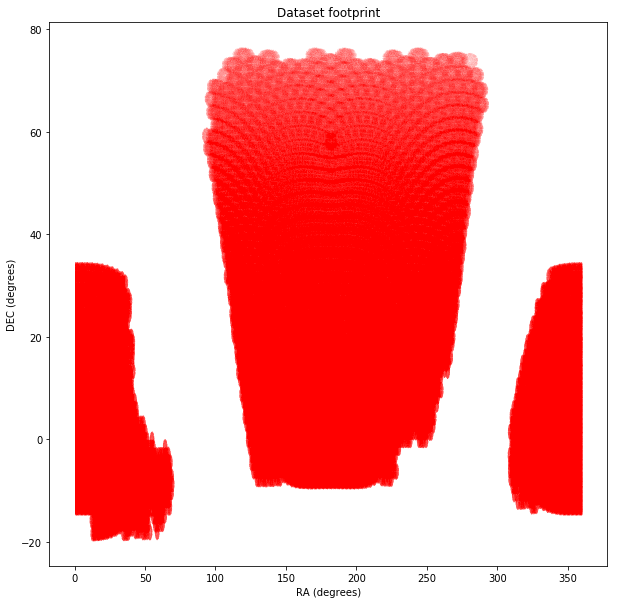

In [12]:
figure(figsize=(10,10))

title('Dataset footprint')
xlabel('RA (degrees)')
ylabel('DEC (degrees)')
plot(darktable[1].data['RA'], darktable[1].data['DEC'], 'r.', markersize=0.01)

We can see from here that our dataset cover a huge area of the sky. In fact it covers approximately one third of the whole sky.

For our purposes we want to extract a patch of this data set for testing some ideas. We are going to work with a patch within $150^° \leq \text{RA} \leq 160^°$ and $40^° \leq \text{RA} \leq 60^°$. The patch we are going to use will be saved in a file called `zcat-0-level1-patch.fits`

In [13]:
hdu_data = darktable[1].data # Point to the ZCATALOG data.

# Create a boolean mask for data which lies inside our defined region.
mask = (hdu_data['RA'] >= 150.) & (hdu_data['RA'] <= 160.) & (hdu_data['DEC'] >= 40.) & (hdu_data['DEC'] <= 60.)
hdu_to_write = hdu_data[mask] # Separate the data with the mask.
hdu = fits.BinTableHDU(data=hdu_to_write) # Convert data into BinTableHDU object.

# Write FITS file to our DESI user directory.
hdu.writeto('/global/project/projectdirs/desi/users/arroyoc/zcat-0-level1-patch.fits', overwrite=True)

In [14]:
# Close .fits file.
darktable.close()

# Analyzing our patched dataset

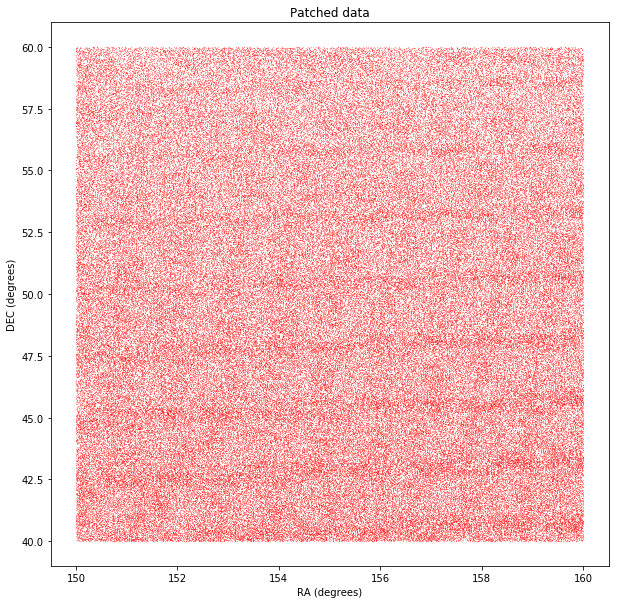

In [19]:
# Absolute path of the file to analyze.
patched_galaxy_catalog = '/global/project/projectdirs/desi/users/arroyoc/zcat-0-level1-patch.fits'
patched_darktable = fits.open(patched_galaxy_catalog)

# We plot all the data points.
figure(figsize = (10,10))
title('Patched data')
xlabel('RA (degrees)')
ylabel('DEC (degrees)')
plot(patched_darktable[1].data['RA'], patched_darktable[1].data['DEC'], 'r.', markersize=0.25)

In [41]:
print(patched_darktable.info())

Filename: /global/project/projectdirs/desi/users/arroyoc/zcat-0-level1-patch.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    118   219642R x 55C   ['K', '8A', '10A', 'E', 'E', 'J', 'J', 'J', 'J', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'K', 'K', 'K', 'K', 'K', 'K', 'E', '10A', '10A', '10A', 'J', 'K', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
None


In [20]:
unique_desi = np.unique(patched_darktable[1].data['DESI_TARGET'])
counts_desi = np.unique(patched_darktable[1].data['DESI_TARGET'], return_counts=True)[1]
print(target_bitmask_to_string(unique_desi, desi_mask))
print()
print(counts_desi)

INFO:targets.py:67:target_bitmask_to_string: Target class LRG+LRG_SOUTH (65537): 1
INFO:targets.py:67:target_bitmask_to_string: Target class ELG+ELG_SOUTH (131074): 1
INFO:targets.py:67:target_bitmask_to_string: Target class QSO+QSO_SOUTH (262148): 1
INFO:targets.py:67:target_bitmask_to_string: Target class ELG+QSO+ELG_SOUTH+QSO_SOUTH (393222): 1
INFO:targets.py:67:target_bitmask_to_string: Target class STD_WD (17179869184): 1
INFO:targets.py:67:target_bitmask_to_string: Target class BGS_ANY (1152921504606846976): 1
INFO:targets.py:67:target_bitmask_to_string: Target class MWS_ANY (2305843009213693952): 1
INFO:targets.py:67:target_bitmask_to_string: Target class STD_WD+MWS_ANY (2305843026393563136): 1
['LRG+LRG_SOUTH' 'ELG+ELG_SOUTH' 'QSO+QSO_SOUTH'
 'ELG+QSO+ELG_SOUTH+QSO_SOUTH' 'STD_WD' 'BGS_ANY' 'MWS_ANY'
 'STD_WD+MWS_ANY']

[ 55448 137659  22934      5      2   2813    358    423]


In [21]:
unique_bgs = np.unique(patched_darktable[1].data['BGS_TARGET'])
count_bgs = np.unique(patched_darktable[1].data['BGS_TARGET'], return_counts=True)[1]

print(target_bitmask_to_string(unique_bgs, bgs_mask))
print()
print(count_bgs)

INFO:targets.py:67:target_bitmask_to_string: Target class  (0): 1
INFO:targets.py:67:target_bitmask_to_string: Target class BGS_FAINT+BGS_FAINT_SOUTH (65537): 1
['' 'BGS_FAINT+BGS_FAINT_SOUTH']

[216829   2813]


In [22]:
unique_mws = np.unique(patched_darktable[1].data['MWS_TARGET'])
count_mws = np.unique(patched_darktable[1].data['MWS_TARGET'], return_counts=True)[1]

print(target_bitmask_to_string(unique_mws, mws_mask))
print()
print(count_mws)

INFO:targets.py:67:target_bitmask_to_string: Target class  (0): 1
INFO:targets.py:67:target_bitmask_to_string: Target class MWS_WD (2): 1
INFO:targets.py:67:target_bitmask_to_string: Target class MWS_NEARBY (4): 1
['' 'MWS_WD' 'MWS_NEARBY']

[218861    587    194]


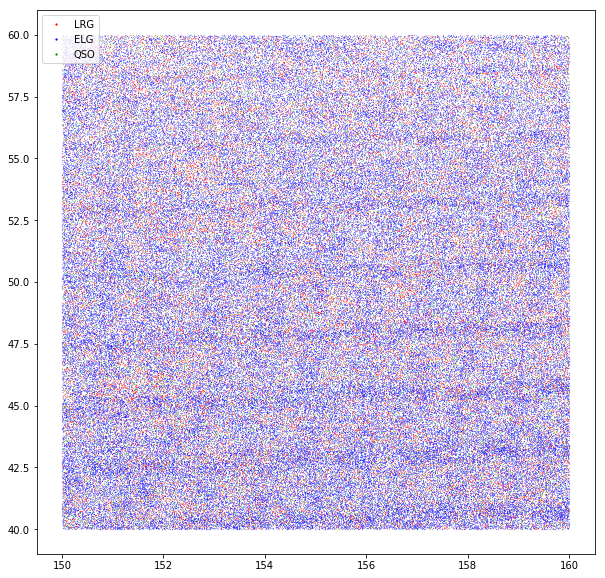

In [36]:
mask_lrg = patched_darktable[1].data['DESI_TARGET'] == 65537
mask_elg = patched_darktable[1].data['DESI_TARGET'] == 131074
mask_qso = patched_darktable[1].data['DESI_TARGET'] == 262148

lrg = patched_darktable[1].data[mask_lrg]
elg = patched_darktable[1].data[mask_elg]
qso = patched_darktable[1].data[mask_qso]

figure(figsize = (10,10))
plot(lrg['RA'], lrg['DEC'], 'ro', markersize=0.12, label='LRG')
plot(elg['RA'], elg['DEC'], 'bo', markersize=0.12, label='ELG')
plot(qso['RA'], qso['DEC'], 'go', markersize=0.12, label='QSO')

legend(loc='upper left', markerscale=10.)

In [46]:
n_objects = 219642 # Number of objects in patch
ramin = 150.; ramax = 160.; decmin = 40.; decmax = 60.;
phimin = np.radians(90.-decmin) # Changes declination to polar angle $\theta$.
phimax = np.radians(90.-decmax)

data = patched_darktable[1].data

for i in np.arange(n_objects):
    if data['DESI_TARGET'][i] == 131074:
        data['RA'][i] = np.random.uniform(ramin, ramax)
        data['DEC'][i] = 90. - np.degrees(np.arccos(np.random.uniform(np.cos(phimin), np.cos(phimax))))
        
hdu = fits.BinTableHDU(data=data)
# Write FITS file to our DESI user directory.
hdu.writeto('/global/project/projectdirs/desi/users/arroyoc/zcat-0-level1-random.fits', overwrite=True)

In [47]:
patched_darktable.close()

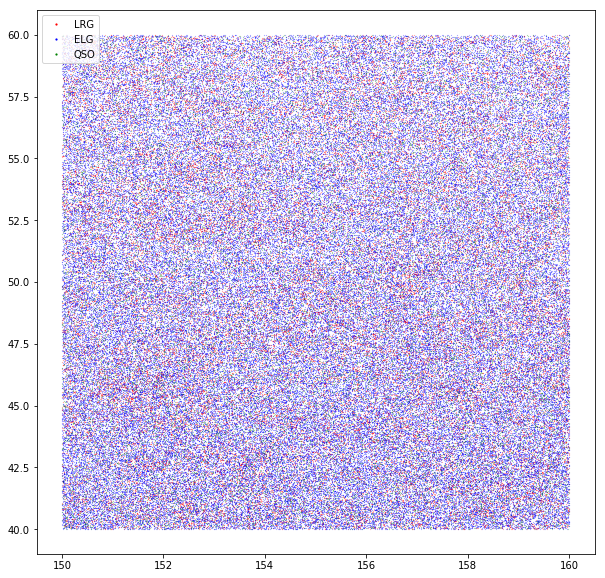

In [48]:
random_galaxy_catalog = '/global/project/projectdirs/desi/users/arroyoc/zcat-0-level1-random.fits'
random_darktable = fits.open(random_galaxy_catalog)

mask_lrg = random_darktable[1].data['DESI_TARGET'] == 65537
mask_elg = random_darktable[1].data['DESI_TARGET'] == 131074
mask_qso = random_darktable[1].data['DESI_TARGET'] == 262148

lrg = random_darktable[1].data[mask_lrg]
elg = random_darktable[1].data[mask_elg]
qso = random_darktable[1].data[mask_qso]

figure(figsize = (10,10))
plot(lrg['RA'], lrg['DEC'], 'ro', markersize=0.12, label='LRG')
plot(elg['RA'], elg['DEC'], 'bo', markersize=0.12, label='ELG')
plot(qso['RA'], qso['DEC'], 'go', markersize=0.12, label='QSO')

legend(loc='upper left', markerscale=10.)

random_darktable.close()

In [60]:
desi_mask

desi_mask:
  - [LRG,              0, "LRG", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MORE_ZGOOD': 3200}, 'numobs': 0}]
  - [ELG,              1, "ELG", {'obsconditions': 'DARK|GRAY', 'priorities': {'UNOBS': 3000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3000, 'MORE_ZGOOD': 3000}, 'numobs': 1}]
  - [QSO,              2, "QSO", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3400, 'MORE_ZGOOD': 3500, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3400}, 'numobs': 4}]
  - [LRG_1PASS,        3, "LRG to be observed once", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MORE_ZGOOD': 3200}, 'numobs': 1}]
  - [LRG_2PASS,        4, "LRG to be observed twice", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MORE_ZGOOD': 3200}, 'numobs': 2}]
  - [LRG_NORTH,        

In [61]:
bgs_mask

bgs_mask:
  - [BGS_FAINT,        0, "BGS faint targets", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 2000, 'MORE_ZWARN': 2000, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_BRIGHT,       1, "BGS bright targets", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2100, 'MORE_ZWARN': 2100, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_WISE,         2, "BGS wise targets", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2000, 'MORE_ZWARN': 2000, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_FAINT_NORTH,  8, "BGS faint cuts tuned for Bok/Mosaic", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 0, 'MORE_ZWARN': 0, 'MORE_ZGOOD': 0, 'DONE': 0, 'OBS': 0, 'DONOTOBSERVE': 0}, 'numobs': 0}]
  - [BGS_BRIGHT_NORTH,  9, "BGS bright cuts tuned for Bok/Mosaic", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 0, 'MORE_ZWARN': 0, 'MORE_ZGOOD': 0, 'DONE

In [62]:
mws_mask

mws_mask:
  - [MWS_BROAD,        0, "Milky Way Survey magnitude limited bulk sample", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 1400, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 1400, 'MORE_ZGOOD': 1400}, 'numobs': 1}]
  - [MWS_WD,           1, "Milky Way Survey White Dwarf", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 2998, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2998, 'MORE_ZGOOD': 2998}, 'numobs': 1}]
  - [MWS_NEARBY,       2, "Milky Way Survey volume-complete ~100pc sample", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 1600, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 1600, 'MORE_ZGOOD': 1600}, 'numobs': 1}]
  - [MWS_BROAD_NORTH,  4, "Milky Way Survey cuts tuned for Bok/Mosaic", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 0, 'DONE': 0, 'OBS': 0, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 0, 'MORE_ZGOOD': 0}, 'numobs': 0}]
  - [MWS_BROAD_SOUTH,  5, "Milky Way Survey cuts tuned for DECam"

In [89]:
print(desi_mask.bitnum('ELG'))
print(desi_mask.bitname(9))

1
ELG_NORTH


In [42]:
print(type(patched_darktable[1].data['DESI_TARGET'][0:100]))

<class 'numpy.ndarray'>
